In [1]:
from fastai.imports import *
import seaborn as sns

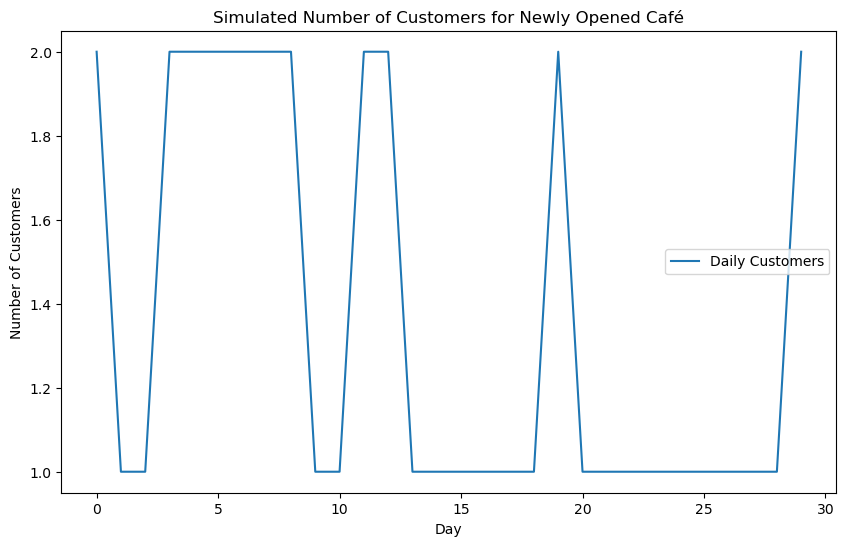

In [41]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(daily_customers_ceil, label='Daily Customers')
plt.xlabel('Day')
plt.ylabel('Number of Customers')
plt.title('Simulated Number of Customers for Newly Opened Café')
plt.legend()
plt.show()

In [42]:
df = pd.DataFrame(daily_customers_ceil, columns=['Daily_Customers'])

In [66]:
df.Daily_Customers.describe()

count    30.000000
mean      1.366667
std       0.490133
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: Daily_Customers, dtype: float64

In [67]:
df.Daily_Customers.max()

2.0

In [68]:
df.Daily_Customers.mean()

1.3666666666666667

In [69]:
df.Daily_Customers.median()

1.0

In [44]:
df.Daily_Customers.value_counts()

Daily_Customers
1.0    19
2.0    11
Name: count, dtype: int64

In [45]:
df.Daily_Customers.sum()

41.0

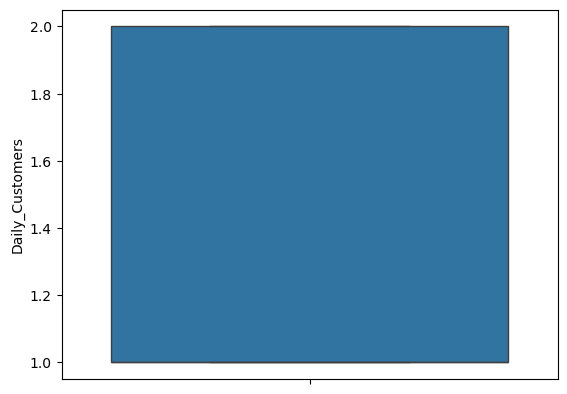

In [46]:
sns.boxplot(data=df, y='Daily_Customers')
plt.show()

In [2]:
def generate_number_of_customer(base_customers):
    days = 30  # Simulate for 30 days
    # base_customers = 1  # Base number of customers per day
    marketing_factor = 1.1  # 10% increase due to marketing
    competition_factor = 0.9  # 10% decrease due to competition
    seasonality_factor = np.sin(np.linspace(0, 2 * np.pi, days)) * 0.1 + 1  # Seasonal variations
    random_variability = np.random.normal(1, 0.1, days)  # Random variability with 10% standard deviation

    daily_customers = base_customers * marketing_factor * competition_factor * seasonality_factor * random_variability
    daily_customers_floor = np.floor(daily_customers)
    daily_customers_ceil = np.ceil(daily_customers)

    return daily_customers_ceil

In [103]:
def plot_the_result(data):
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(data['Daily_Customers'], label='Daily Customers')
    plt.xlabel('Day')
    plt.ylabel('Number of Customers')
    plt.title('Simulated Number of Customers for Newly Opened Café')
    plt.legend()
    plt.show()

In [99]:
base_customers = 1
current_mean = 0
iter_count = 0

TARGET_MEAN_CUSTOMER = 100

df = 0

while current_mean < TARGET_MEAN_CUSTOMER:
    data = generate_number_of_customer(base_customers)
    temp_df = pd.DataFrame(data, columns=['Daily_Customers'])
    current_max = temp_df.Daily_Customers.max()
    current_mean = temp_df.Daily_Customers.mean()
    temp_df['month'] = iter_count + 1

    if iter_count == 0:
        df = temp_df
    else:
        df = pd.concat([df, temp_df], axis=0, ignore_index=True)
    
    base_customers += current_max
    iter_count += 1
    # print(current_mean)

number_of_month = iter_count
print(f'Number of month: {number_of_month}')

# plot_the_result(data)

Number of month: 7


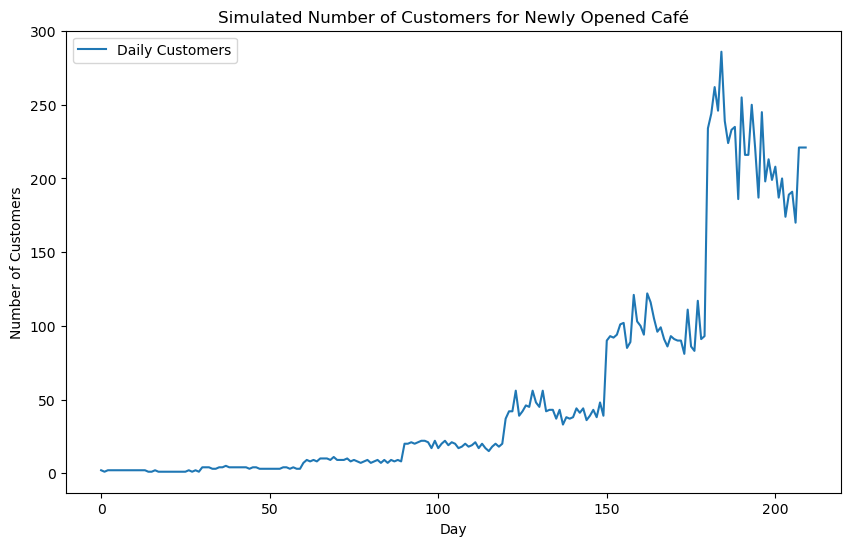

In [104]:
plot_the_result(df)

In [105]:
df['Sales_RM'] = df['Daily_Customers'] * 10

In [106]:
df['Dine_in_Normal'] = 0
df['Dine_in_Peak'] = 0

In [107]:
df

,Daily_Customers,month,Sales_RM,Dine_in_Normal,Dine_in_Peak
0,2.0,1,20.0,0,0
1,1.0,1,10.0,0,0
2,2.0,1,20.0,0,0
3,2.0,1,20.0,0,0
4,2.0,1,20.0,0,0
...,...,...,...,...,...
205,191.0,7,1910.0,0,0
206,170.0,7,1700.0,0,0
207,221.0,7,2210.0,0,0
208,221.0,7,2210.0,0,0


In [108]:
df_monthly_summary = 0
iter_count = 1

TARGET_RM = 30000

while iter_count < number_of_month + 1:
    df_current_month = df[df['month'] == iter_count]
    temp_dict = {
        'Month': iter_count,
        'Total_Sales_RM': df_current_month.Sales_RM.sum(),
        'Target_RM': TARGET_RM,
        'Profit_RM': df_current_month.Sales_RM.sum() - TARGET_RM
    }
    temp_df = pd.DataFrame([temp_dict])
    
    if iter_count == 1:
        df_monthly_summary = temp_df
    else:
        df_monthly_summary = pd.concat([df_monthly_summary, temp_df], axis=0, ignore_index=True)
        
    iter_count += 1

In [109]:
df_monthly_summary

,Month,Total_Sales_RM,Target_RM,Profit_RM
0,1,460.0,30000,-29540.0
1,2,1080.0,30000,-28920.0
2,3,2580.0,30000,-27420.0
3,4,5830.0,30000,-24170.0
4,5,12800.0,30000,-17200.0
5,6,29050.0,30000,-950.0
6,7,65710.0,30000,35710.0


In [18]:
# df.head()

,Customer,Type,Hour
0,1,Dine-in,Normal-hour
1,2,Dine-in,Normal-hour
2,3,Delivery,Normal-hour
3,4,Dine-in,Normal-hour
4,5,Dine-in,Normal-hour


In [28]:
# (distribution.values > 10).any()

True

In [32]:
# distribution.values

array([[11, 32],
       [10, 47]], dtype=int64)

In [30]:
# threshold = 30
# exceeds_threshold = distribution > threshold
# exceeding_categories = exceeds_threshold[exceeds_threshold].stack().index.tolist()
# exceeding_categories

[('Delivery', 'Peak-hour'), ('Dine-in', 'Peak-hour')]

In [31]:
# exceeds_threshold

Hour,Normal-hour,Peak-hour
Type,,
Delivery,False,True
Dine-in,False,True


In [36]:
# exceeds_threshold[exceeds_threshold].stack()

Type      Hour     
Delivery  Peak-hour    True
Dine-in   Peak-hour    True
dtype: object

In [120]:
for index, row in df.iterrows():
    # Number of customers
    total_customers = int(row['Daily_Customers'])
    
    # Probabilities
    dine_in_prob = 0.4
    delivery_prob = 0.6
    peak_hour_prob = 0.7
    normal_hour_prob = 0.3
    
    # Simulate dine-in vs delivery
    dine_in_delivery = np.random.choice(['Dine-in', 'Delivery'], total_customers, p=[dine_in_prob, delivery_prob])
    
    # Simulate peak-hour vs normal-hour
    peak_normal_hour = np.random.choice(['Peak-hour', 'Normal-hour'], total_customers, p=[peak_hour_prob, normal_hour_prob])
    
    # Combine into DataFrame
    temp_df = pd.DataFrame({
        'Customer': range(1, total_customers + 1),
        'Type': dine_in_delivery,
        'Hour': peak_normal_hour
    })
    
    # Display the first few rows of the DataFrame
    # print(df.head())
    
    # Summarize the distribution
    distribution = temp_df.groupby(['Type', 'Hour']).size().unstack(fill_value=0)
    # print(distribution)

    # Define a threshold
    threshold = 30

    # print(temp_df)
    if not temp_df.Type.str.contains('Dine-in').any():
        continue
    if not temp_df.Hour.str.contains('Normal-hour').any():
        continue
    if not temp_df.Hour.str.contains('Peak-hour').any():
        continue

    # Check which 'Dine-in' categories exceed the threshold
    dine_in_exceeds_threshold = distribution.loc['Dine-in'] > threshold
    
    # Extract the values of 'Dine-in' categories that exceed the threshold
    dine_in_exceeding_values = distribution.loc['Dine-in'][dine_in_exceeds_threshold]

    df.at[index, 'Dine_in_Normal'] = distribution.loc['Dine-in', 'Normal-hour']
    df.at[index, 'Dine_in_Peak'] = distribution.loc['Dine-in', 'Peak-hour']

    # if not dine_in_exceeding_values.empty:
    #     print(distribution)
    #     print(distribution.loc['Dine-in'])
    #     print(distribution.loc['Dine-in', 'Peak-hour'])

In [116]:
df

,Daily_Customers,month,Sales_RM,Dine_in_Normal,Dine_in_Peak
0,2.0,1,20.0,0,0
1,1.0,1,10.0,0,0
2,2.0,1,20.0,1,1
3,2.0,1,20.0,0,1
4,2.0,1,20.0,1,1
...,...,...,...,...,...
205,191.0,7,1910.0,24,83
206,170.0,7,1700.0,40,73
207,221.0,7,2210.0,51,81
208,221.0,7,2210.0,35,94


In [122]:
df.Dine_in_Peak.max()

84

In [119]:
12000 * 6

72000

In [127]:
np.arctan2(75,330)

0.22347660114063303

In [130]:
p0 = [100, 0, 50]
p1 = [100, 75, 50+155]

[100, 75, 205]

In [134]:
virtual_d1 = np.sqrt(np.power(p1[1] - p0[1], 2) + np.power(p1[2] - p0[2], 2))
virtual_d1

172.19175357722565

In [143]:
angle_offset_p1 = np.arctan2(p1[1] - p0[1], p1[2] - p0[2]);
angle_offset_p1

0.45066132608063364

In [138]:
np.rad2deg(angle_offset_p1)

25.82099197418928

In [144]:
angle_offset_p1 = np.arctan2(p1[2] - p0[2], p1[1] - p0[1]);
angle_offset_p1

1.120135000714263

In [145]:
np.rad2deg(angle_offset_p1)

64.17900802581072

In [147]:
0.4*3000

1200.0